<a href="https://colab.research.google.com/github/ARUNAGIRI1617/LGMVIP-DataScience/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REQUIREMENTS

In [ ]:
!pip install flaml[notebook]


In [ ]:
!pip install sweetviz

DATA FETCHING


In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv(r'/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.columns = ["Id","Sepal Length","Sepal Width","Petal Length","Petal Width","Species"]
df.columns

Index(['Id', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.Species.unique()

array([0, 1, 2])

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [ ]:
df.Species.unique()

array([0, 1, 2])

Report

In [ ]:
import sweetviz as sv
report=sv.analyze(source=df)
report.show_html('Iris Report')

                                             |          | [  0%]   00:00 -> (? left)

Report Iris Report was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Detecting None

In [ ]:
df.isnull().sum()

Id               0
Sepal Length     0
Sepal Width      0
Pental Length    0
Petal Width      0
Species          0
dtype: int64

Visualizing EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


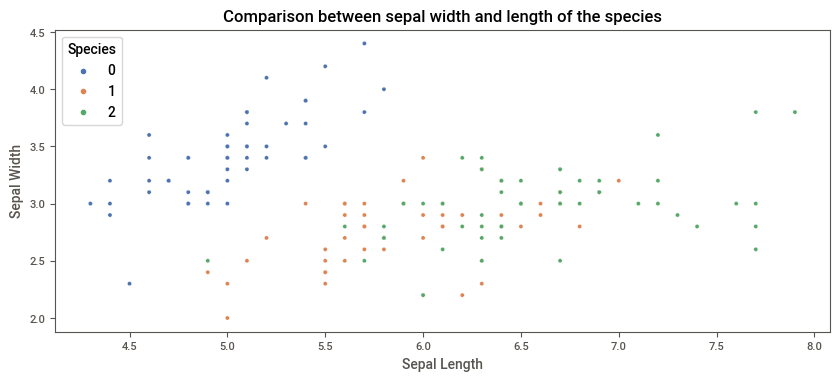

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
plt.title('Comparison between sepal width and length of the species')
sns.scatterplot(df['Sepal Length'],df['Sepal Width'],hue=df['Species'],palette='deep')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


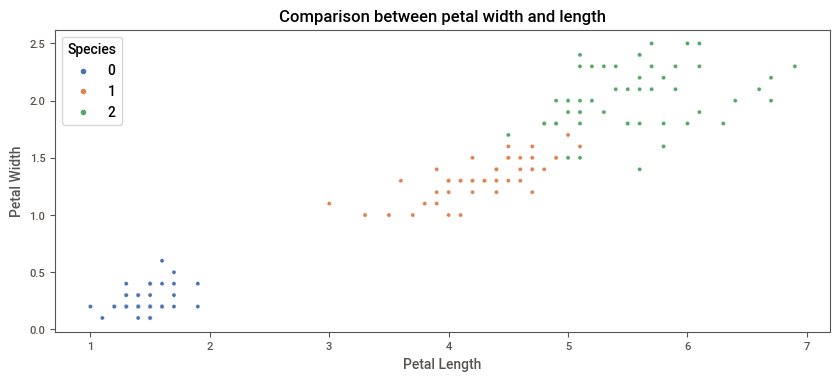

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Comparison between petal width and length')
sns.scatterplot(df['Petal Length'],df['Petal Width'],hue=df['Species'],palette='deep')
plt.show()

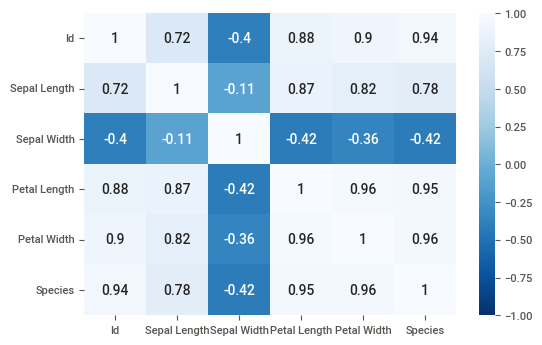

In [ ]:
#correlation 
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='Blues_r')#you can use viridis

SPLITING TRAINING AND TESTING DATA



In [ ]:
X = df.drop(['Id','Species'], axis = 1)
Y = df['Species']

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [ ]:
from flaml import AutoML
automl = AutoML()

In [ ]:
settings = {
"time_budget": 200,  # total runtime in seconds
"metric": 'accuracy',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
"task": 'classification',  # task type  classification or regression
"log_file_name": 'Iris.log',  # flaml log file
}

In [ ]:
automl.fit(X_train, Y_train, **settings)

[flaml.automl: 11-01 16:25:57] {1463} INFO - Data split method: stratified
[flaml.automl: 11-01 16:25:57] {1467} INFO - Evaluation method: cv
[flaml.automl: 11-01 16:25:57] {1515} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 11-01 16:25:57] {1552} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 11-01 16:25:57] {1793} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-01 16:25:57] {1911} INFO - Estimated sufficient time budget=649s. Estimated necessary time budget=11s.
[flaml.automl: 11-01 16:25:57] {1987} INFO -  at 0.1s,	estimator lgbm's best error=0.0762,	best estimator lgbm's best error=0.0762
[flaml.automl: 11-01 16:25:57] {1793} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-01 16:25:57] {1987} INFO -  at 0.2s,	estimator lgbm's best error=0.0762,	best estimator lgbm's best error=0.0762
[flaml.automl: 11-01 16:25:57] {1793} INFO - iteration 2, current learner lgbm
[flaml.automl: 11-01 16:25:57

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))




Best ML leaner: lrl1
Best hyperparmeter config: {'C': 1.0}
Best accuracy on validation data: 0.981
Training duration of best run: 0.5637 s


In [ ]:
#To check which is the model selected by FLAML
automl.model

Accuracy

In [ ]:
#We are predicting x_test.
Y_pred = automl.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(Y_test,Y_pred))

Accuracy: 0.9555555555555556


In [ ]:
y_actual=np.array(Y_test)
y_actual

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

